# Lead Scoring Case Study

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Import and understand data

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Handling missing data

In [5]:
# Replace Select in respective columns with Nulls
leads['Specialization'].replace(to_replace =["Select"], value = np.nan,inplace = True)
leads['How did you hear about X Education'].replace(to_replace =["Select"], value = np.nan,inplace = True)
leads['Lead Profile'].replace(to_replace =["Select"], value = np.nan,inplace = True)
leads['City'].replace(to_replace =["Select"], value = np.nan,inplace = True)

In [6]:
#Number of nulls in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
#checking if any row contains all null values
leads.isnull().all(axis=1).sum()

0

In [8]:
#percentage of nulls in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
#dropping columns containing more than 40% nulls
leads = leads.drop(['Last Notable Activity','How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
#rows containing more than 5 null values
leads[leads.isnull().sum(axis=1) > 5]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
47,3f04fd93-2884-45f6-a4fc-f3b6f234554b,660153,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
49,319325b3-50b3-45d0-b730-c9df0b30b9ea,660128,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
63,dba70a60-f322-4372-b7d5-3d24026a4750,659896,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,No,No,No,NaN,No,No,NaN,No,No
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,No,No,No,NaN,No,No,NaN,No,No
83,09526992-b1fb-4763-8cca-355bc5dac5e3,659700,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,NaN,No,No,NaN,No,No
134,0298b9a5-fedb-408b-a284-2d357583600f,659153,Lead Add Form,Welingak Website,No,No,1,NaN,889,NaN,...,No,No,No,No,NaN,No,No,NaN,No,No


In [11]:
#percentage of rows that will be dropped 
100*(len(leads[leads.isnull().sum(axis=1) > 5].index) / len(leads.index))

9.458874458874458

In [12]:
#dropping rows containing more than 5 null values
leads = leads[leads.isnull().sum(axis=1) <= 5]

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.05
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.05
Last Activity                                     0.78
Country                                          18.97
Specialization                                   29.95
What is your current occupation                  22.21
What matters most to you in choosing a course    22.44
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
#dropping columns which still contain near 30% nulls
leads = leads.drop(['City', 'Tags'], axis=1)

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.05
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.05
Last Activity                                     0.78
Country                                          18.97
Specialization                                   29.95
What is your current occupation                  22.21
What matters most to you in choosing a course    22.44
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
leads.shape

(8366, 27)

In [15]:
#Count of occurrences of each distict value in Country column
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Belgium                    2
Ghana                      2
Bangladesh                 2
Philippines                2
Italy                      2
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
China                      2
Denmark                    1
Switzerland                1
Liberia                    1
Vietnam                    1
Indonesia                  1
Russia                     1
Tanzania      

In [16]:
#replacing nulls in country column with the most frequent occurrence
leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'

In [17]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.05
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.05
Last Activity                                     0.78
Country                                           0.00
Specialization                                   29.95
What is your current occupation                  22.21
What matters most to you in choosing a course    22.44
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
#Count of occurrences of each distict value in What is your current occupation column
leads['What is your current occupation'].value_counts()

Unemployed              5559
Working Professional     705
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
#replacing nulls in What is your current occupation column with the most frequent occurrence
leads.loc[pd.isnull(leads['What is your current occupation']), ['What is your current occupation']] = 'Unemployed'

In [20]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.05
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.05
Last Activity                                     0.78
Country                                           0.00
Specialization                                   29.95
What is your current occupation                   0.00
What matters most to you in choosing a course    22.44
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [21]:
#Count of occurrences of each distict value in What matters most to you in choosing a course column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6486
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
#replacing nulls in What matters most to you in choosing a course column with the most frequent occurrence
leads.loc[pd.isnull(leads['What matters most to you in choosing a course']), ['What matters most to you in choosing a course']] = 'Better Career Prospects'

In [23]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.05
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.05
Last Activity                                     0.78
Country                                           0.00
Specialization                                   29.95
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
#Count of occurrences of each distict value in Specialization column
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [25]:
#import library for generating random number
import random

#replacing nulls with random numbers based on the distribution
for index, row in leads.iterrows():
    if(pd.isnull(row['Specialization'])):
        leads.loc[index,'Specialization'] = np.random.choice(np.arange(1, 19), p=[0.17,0.147,0.143,0.085,0.068,0.062,0.059,0.057,0.034,0.034,0.030,0.027,0.02,0.019,0.017,0.013,0.009,0.006])

In [26]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
1                                    408
Business Administration              403
2                                    400
IT Projects Management               366
Supply Chain Management              349
3                                    343
Banking, Investment And Insurance    338
4                                    208
Media and Advertising                203
Travel and Tourism                   203
International Business               178
5                                    176
6                                    172
Healthcare Management                159
8                                    142
7                                    141
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
9                                     91
10              

In [27]:
#mapping the random numbers to each value of the column
leads['Specialization'].replace(to_replace =[1], value = "Finance Management",inplace = True)
leads['Specialization'].replace(to_replace =[2], value = "Human Resource Management",inplace = True)
leads['Specialization'].replace(to_replace =[3], value = "Marketing Management",inplace = True)
leads['Specialization'].replace(to_replace =[4], value = "Operations Management",inplace = True)
leads['Specialization'].replace(to_replace =[5], value = "Business Administration",inplace = True)
leads['Specialization'].replace(to_replace =[6], value = "IT Projects Management",inplace = True)
leads['Specialization'].replace(to_replace =[7], value = "Supply Chain Management",inplace = True)
leads['Specialization'].replace(to_replace =[8], value = "Banking, Investment And Insurance",inplace = True)
leads['Specialization'].replace(to_replace =[9], value = "Travel and Tourism",inplace = True)
leads['Specialization'].replace(to_replace =[10], value = "Media and Advertising",inplace = True)
leads['Specialization'].replace(to_replace =[11], value = "International Business",inplace = True)
leads['Specialization'].replace(to_replace =[12], value = "Healthcare Management",inplace = True)
leads['Specialization'].replace(to_replace =[13], value = "Hospitality Management",inplace = True)
leads['Specialization'].replace(to_replace =[14], value = "E-COMMERCE",inplace = True)
leads['Specialization'].replace(to_replace =[15], value = "Retail Management",inplace = True)
leads['Specialization'].replace(to_replace =[16], value = "Rural and Agribusiness",inplace = True)
leads['Specialization'].replace(to_replace =[17], value = "E-Business",inplace = True)
leads['Specialization'].replace(to_replace =[18], value = "Services Excellence",inplace = True)

In [28]:
leads['Specialization'].value_counts()

Finance Management                   1384
Human Resource Management            1248
Marketing Management                 1181
Operations Management                 711
Business Administration               579
IT Projects Management                538
Supply Chain Management               490
Banking, Investment And Insurance     480
Travel and Tourism                    294
Media and Advertising                 287
International Business                256
Healthcare Management                 208
Hospitality Management                167
E-COMMERCE                            159
Retail Management                     149
Rural and Agribusiness                104
E-Business                             78
Services Excellence                    53
Name: Specialization, dtype: int64

In [29]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.36
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.05
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.05
Last Activity                                    0.78
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [30]:
#rows with null values
leads[leads.isnull().any(axis=1) >= 1]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,No,No,No,No,No,No,No,No,No
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,No,No,No,No,No,No,No,No,No
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,No,No,No,No,No,No,No,No,No
133,63ebde80-a465-4cdc-ab5a-5e880a7138b0,659158,Lead Add Form,Reference,No,No,1,NaN,986,NaN,...,No,No,No,No,No,No,No,No,No,No
177,3b74e995-4407-44de-9e59-622afb514261,658648,Lead Add Form,Welingak Website,No,No,1,NaN,1240,NaN,...,No,No,No,No,No,No,No,No,No,No
195,d60b3133-9845-4d68-8675-6666c7dc57c9,658432,Lead Add Form,Reference,No,No,1,NaN,785,NaN,...,No,No,No,No,No,No,No,No,No,No
212,b6a07644-72d3-40b7-9c75-f996c6ee96a0,658258,Lead Add Form,Reference,No,No,1,NaN,1070,NaN,...,No,No,No,No,No,No,No,No,No,No
269,35c83b23-921f-47da-8a95-5ebab14962ad,657590,Lead Add Form,Reference,No,No,1,NaN,1262,NaN,...,No,No,No,No,No,No,No,No,No,No
299,149ea70e-6f74-4c23-8102-ff16b27d6b13,657247,Lead Add Form,Reference,No,No,1,NaN,803,NaN,...,No,No,No,No,No,No,No,No,No,No
348,aab15462-f9bd-4c1a-99f8-f1086cbbc9e0,656715,Lead Add Form,Reference,No,No,1,NaN,43,NaN,...,No,No,No,No,No,No,No,No,No,No


In [31]:
#removing columns containing atleast 1 null value
leads = leads[leads.isnull().sum(axis=1) == 0]

In [32]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [33]:
leads.shape

(8249, 27)

## Label Encoding

In [34]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,No


In [35]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [36]:
leads['Do Not Email'].value_counts()

No     7580
Yes     669
Name: Do Not Email, dtype: int64

In [37]:
#create a list of columns containing only Yes-No as values
BinaryCols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

#mapping the yes and no to 1 and 0 in the list created
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[BinaryCols] = leads[BinaryCols].apply(binary_map)

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 9239
Data columns (total 27 columns):
Prospect ID                                      8249 non-null object
Lead Number                                      8249 non-null int64
Lead Origin                                      8249 non-null object
Lead Source                                      8249 non-null object
Do Not Email                                     8249 non-null int64
Do Not Call                                      8249 non-null int64
Converted                                        8249 non-null int64
TotalVisits                                      8249 non-null float64
Total Time Spent on Website                      8249 non-null int64
Page Views Per Visit                             8249 non-null float64
Last Activity                                    8249 non-null object
Country                                          8249 non-null object
Specialization                                   8249 no

In [39]:
#create dummy columns for Lead Origin column
temp = pd.get_dummies(leads['Lead Origin'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['Lead Origin'], axis = 1, inplace = True)

In [40]:
#create dummy columns for Lead Source column
temp = pd.get_dummies(leads['Lead Source'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['Lead Source'], axis = 1, inplace = True)

In [41]:
#create dummy columns for Last Activity column
temp = pd.get_dummies(leads['Last Activity'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['Last Activity'], axis = 1, inplace = True)

In [42]:
#create dummy columns for Country column
temp = pd.get_dummies(leads['Country'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['Country'], axis = 1, inplace = True)

In [43]:
#create dummy columns for Specialization column
temp = pd.get_dummies(leads['Specialization'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['Specialization'], axis = 1, inplace = True)

In [44]:
#create dummy columns for What is your current occupation column
temp = pd.get_dummies(leads['What is your current occupation'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['What is your current occupation'], axis = 1, inplace = True)

In [45]:
#create dummy columns for What matters most to you in choosing a course column
temp = pd.get_dummies(leads['What matters most to you in choosing a course'], drop_first = True)
leads = pd.concat([leads, temp], axis = 1)
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 9239
Columns: 120 entries, Prospect ID to Other
dtypes: float64(2), int64(17), object(1), uint8(100)
memory usage: 2.1+ MB


In [47]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Working Professional,Flexibility & Convenience,Other
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#drop Prospect ID and Lead Number columns as they are only unique identifiers and they do not add any value to further anlysis
final_leads = leads.drop(['Prospect ID','Lead Number'],axis=1)

In [49]:
final_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 9239
Columns: 118 entries, Do Not Email to Other
dtypes: float64(2), int64(16), uint8(100)
memory usage: 2.0 MB


## Splitting data

In [50]:
#import library for splitting data
from sklearn.model_selection import train_test_split

In [51]:
#creating dataframe with predictor variables
X = final_leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Working Professional,Flexibility & Convenience,Other
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
#creating a dataframe with response variable
y = final_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling columns

In [54]:
#import library for scaling data
from sklearn.preprocessing import StandardScaler

In [55]:
#scaling the variable which need to be scaled
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\dines\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dines\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Working Professional,Flexibility & Convenience,Other
5675,0,0,0.216865,-0.170757,1.103513,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6288,0,0,-0.149644,-0.700847,-0.504866,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5429,0,0,-0.332898,0.913023,-0.275097,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1693,0,0,-0.149644,1.301513,0.184440,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3868,0,0,-0.516152,-0.878754,-0.734634,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
#Lead Conversion rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

40.93829555097588

## Initial model building

In [57]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

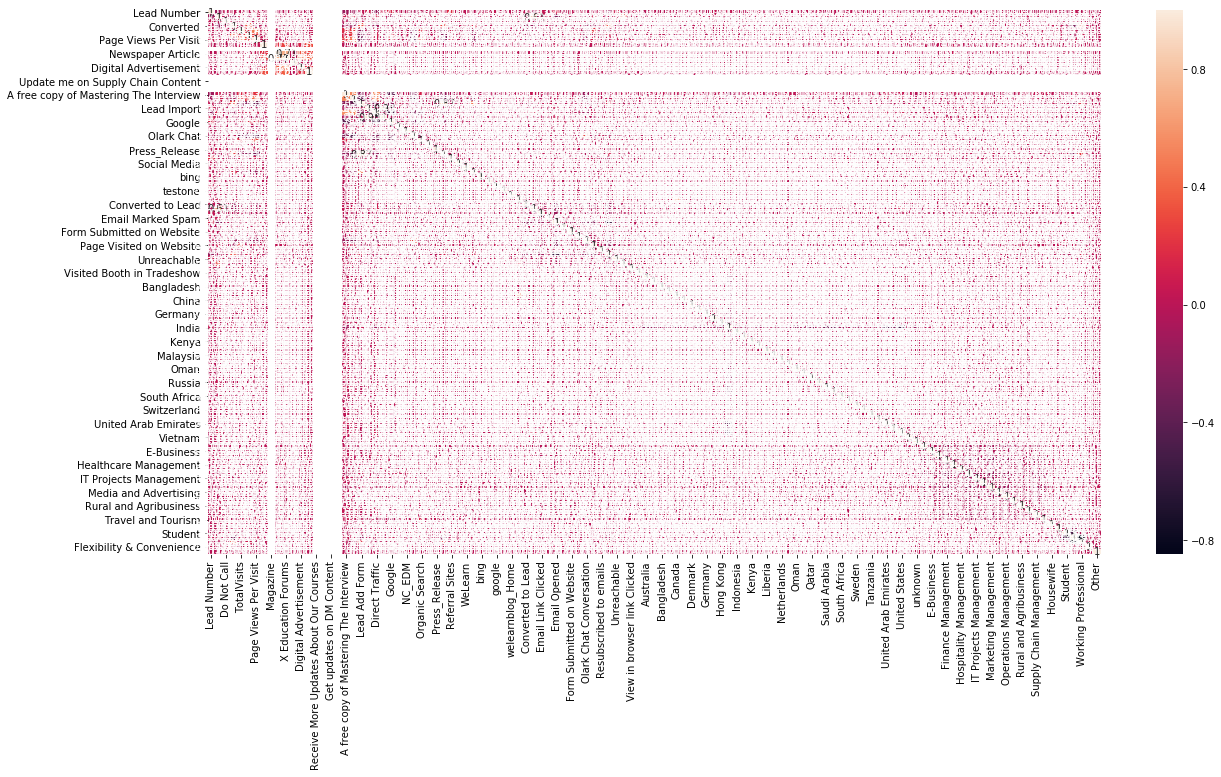

In [58]:
#correlation between variables
plt.figure(figsize = (20,10))
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [59]:
#building initial model with all variables
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5667
Model Family:                Binomial   Df Model:                          106
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 13 Oct 2019   Deviance:                          nan
Time:                        22:15:34   Pearson chi2:                 7.13e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      6.34e+15   8.72e+07   7.27e+07      0.000    6.34e+15    6.34e+15
Do Not Email                             -9.107e+14   4.59e+06  -1.98e+08      0.000   -9.11e+14   -9.11e+14
Do Not Call                               4.657e+15   4.76e+07   9.77e+07      0.000    4.66e+15    4.66e+15
TotalVisits                               5.468e+13   1.02e+06   5.37e+07      0.000    5.47e+13    5.47e+13
Total Time Spent on Website               2.127e+14   9.83e+05   2.16e+08      0.000    2.13e+14    2.13e+14
Page Views Per Visit                      2.646e+13    1.2e+06   2.21e+07      0.000    2.65e+13    2.65e+13
Search                                   -9.651e+14   2.75e+07  -3.51e+07      0.000   -9.65e+14   -9.65e+14
Magazine                                   -19.9648   1.44e-06  -1.38e+07      0.000     -19.965     -19.965
Newspaper Article                         4.941e+15   6.73e+07   7.34e+07      0.000    4.94e+15    4.94e+15
X Education Forums                       -1.406e+16   1.22e+08  -1.15e+08      0.000   -1.41e+16   -1.41e+16
Newspaper                                -4.323e+15   6.72e+07  -6.43e+07      0.000   -4.32e+15   -4.32e+15
Digital Advertisement                     4.806e+15   6.73e+07   7.15e+07      0.000    4.81e+15    4.81e+15
Through Recommendations                   1.582e+15   3.64e+07   4.35e+07      0.000    1.58e+15    1.58e+15
Receive More Updates About Our Courses      11.1885   1.61e-06   6.95e+06      0.000      11.188      11.188
Update me on Supply Chain Content           26.7561    7.4e-07   3.62e+07      0.000      26.756      26.756
Get updates on DM Content                   16.1845    6.2e-07   2.61e+07      0.000      16.184      16.184
I agree to pay the amount through cheque   -79.1437   1.45e-06  -5.44e+07      0.000     -79.144     -79.144
A free copy of Mastering The Interview    9.539e+13   2.61e+06   3.65e+07      0.000    9.54e+13    9.54e+13
Landing Page Submission                  -1.298e+14   2.69e+06  -4.82e+07      0.000    -1.3e+14    -1.3e+14
Lead Add Form                             2.361e+14   4.76e+07   4.96e+06      0.000    2.36e+14    2.36e+14
Lead Import                               2.666e+15   7.16e+07   3.72e+07      0.000    2.67e+15    2.67e+15
Direct Traffic                           -2.044e+15   6.14e+07  -3.33e+07      0.000   -2.04e+15   -2.04e+15
Facebook                                 -6.245e+15   9.28e+07  -6.73e+07      0.000   -6.24e+15   -6.24e+15
Google                                   -1.933e+15   6.14e+07  -3.15e+07      0.000   -1.93e+15   -1.93e+15
Live Chat                                 1.935e+15   7.75e+07    2.5e+07      0.000    1.94e+15    1.94e+15
NC_EDM                                       7.5134   6.55e-07   1.15e+07      0.000       7.513       7.513
O

## Recursive Feature Elimination

In [60]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
#perform RFE to obtain to 20 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [62]:
#ranking of columns based on importance
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 57),
 ('Search', False, 8),
 ('Magazine', False, 89),
 ('Newspaper Article', False, 28),
 ('X Education Forums', False, 39),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 64),
 ('Through Recommendations', False, 56),
 ('Receive More Updates About Our Courses', False, 92),
 ('Update me on Supply Chain Content', False, 97),
 ('Get updates on DM Content', False, 98),
 ('I agree to pay the amount through cheque', False, 94),
 ('A free copy of Mastering The Interview', False, 83),
 ('Landing Page Submission', False, 74),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Direct Traffic', False, 19),
 ('Facebook', False, 46),
 ('Google', False, 22),
 ('Live Chat', False, 50),
 ('NC_EDM', False, 90),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 21),
 ('Pay per Click Ads', False, 40),
 ('Press_Release', Fa

In [63]:
#columns with top 20 features
col = X_train.columns[rfe.support_]

In [64]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Direct Traffic', 'Facebook', 'Google', 'Live Chat', 'NC_EDM',
       'Organic Search', 'Pay per Click Ads', 'Press_Release',
       'Referral Sites', 'Social Media', 'WeLearn', 'bing', 'blog', 'google',
       'testone', 'welearnblog_Home', 'youtubechannel', 'Email Link Clicked',
       'Email Opened', 'Email Received', 'Page Visited on Website',
       'Resubscribed to emails', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked', 'Visited Booth in Tradeshow',
       'Australia', 'Bahrain', 'Bangladesh', 'Belgium', 'Canada', 'Ch

## Final model building

In [65]:
#model with top 20 models
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5753
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.2
Date:                Sun, 13 Oct 2019   Deviance:                       5060.4
Time:                        22:15:36   Pearson chi2:                 6.17e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4131      0.509     -0.811      0.417      -1.411       0.585
Do Not Email                   -1.4850      0.198     -7.492      0.000      -1.874      -1.097
Total Time Spent on Website     1.1476      0.040     28.442      0.000       1.068       1.227
Newspaper                     -23.9939   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Add Form                   2.3702      0.927      2.558      0.011       0.554       4.186
Lead Import                     1.3649      0.532      2.566      0.010       0.322       2.408
Olark Chat                      1.7272      0.114     15.190      0.000       1.504       1.950
Reference                       1.6166      0.953      1.696      0.090      -0.252       3.485
Welingak Website                3.4419      1.179      2.919      0.004       1.131       5.753
Converted to Lead              -1.2568      0.210     -5.982      0.000      -1.669      -0.845
Email Bounced                  -0.8683      0.400     -2.172      0.030      -1.652      -0.085
Email Marked Spam              22.4579   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Form Submitted on Website      -0.7138      0.346     -2.063      0.039      -1.392      -0.036
Had a Phone Conversation        1.3595      0.671      2.027      0.043       0.045       2.674
Olark Chat Conversation        -1.2475      0.170     -7.336      0.000      -1.581      -0.914
SMS Sent                        1.1003      0.077     14.362      0.000       0.950       1.250
Italy                         -23.6689    2.7e+04     -0.001      0.999   -5.29e+04    5.28e+04
Housewife                      21.7274   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
Student                        -0.6758      0.549     -1.231      0.218      -1.752       0.401
Unemployed                     -0.8235      0.510     -1.614      0.106      -1.823       0.176
Working Professional            1.9285      0.541      3.562      0.000       0.867       2.990
===============================================================================================
"""

In [66]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5675    0.417697
6288    0.130880
5429    0.452931
1693    0.983845
3868    0.029259
8401    0.111422
1223    0.659985
8068    0.837482
6300    0.709383
7700    0.164624
dtype: float64

In [67]:
#list of first 10 predictions
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41769709, 0.13088018, 0.45293092, 0.98384536, 0.02925907,
       0.11142228, 0.65998548, 0.83748199, 0.7093834 , 0.16462354])

In [68]:
#creating a dataframe with the actual value and predicted value
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.417697,5675
1,0,0.130880,6288
2,0,0.452931,5429
3,1,0.983845,1693
4,0,0.029259,3868


In [69]:
#assinging a prediction based on cut off of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.417697,5675,0
1,0,0.130880,6288,0
2,0,0.452931,5429,0
3,1,0.983845,1693,1
4,0,0.029259,3868,0


In [70]:
from sklearn import metrics

In [71]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2993  434]
 [ 700 1647]]


In [72]:
#accuracy of the model built
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.803602355386214


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Add Form,66.66
6,Reference,52.34
7,Welingak Website,15.36
18,Unemployed,2.06
0,Do Not Email,1.73
14,SMS Sent,1.68
9,Email Bounced,1.66
5,Olark Chat,1.37
19,Working Professional,1.23
13,Olark Chat Conversation,1.22


In [75]:
#drop column due to high VIF
col = col.drop('Lead Add Form', 1)

In [76]:
#build model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5754
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.6
Date:                Sun, 13 Oct 2019   Deviance:                       5067.2
Time:                        22:15:37   Pearson chi2:                 6.17e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4098      0.509     -0.805      0.421      -1.407       0.588
Do Not Email                   -1.4867      0.198     -7.507      0.000      -1.875      -1.099
Total Time Spent on Website     1.1439      0.040     28.398      0.000       1.065       1.223
Newspaper                     -23.9922   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Import                     1.3553      0.532      2.548      0.011       0.313       2.398
Olark Chat                      1.7239      0.114     15.179      0.000       1.501       1.947
Reference                       3.9785      0.239     16.614      0.000       3.509       4.448
Welingak Website                5.8044      0.734      7.913      0.000       4.367       7.242
Converted to Lead              -1.2610      0.210     -6.006      0.000      -1.673      -0.849
Email Bounced                  -0.8704      0.400     -2.179      0.029      -1.654      -0.087
Email Marked Spam              22.4597   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Form Submitted on Website      -0.7177      0.346     -2.077      0.038      -1.395      -0.040
Had a Phone Conversation        1.3538      0.670      2.020      0.043       0.040       2.667
Olark Chat Conversation        -1.2523      0.170     -7.369      0.000      -1.585      -0.919
SMS Sent                        1.0965      0.077     14.326      0.000       0.946       1.246
Italy                         -23.6659    2.7e+04     -0.001      0.999   -5.29e+04    5.29e+04
Housewife                      21.7281   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
Student                        -0.6765      0.549     -1.233      0.218      -1.752       0.399
Unemployed                     -0.8200      0.510     -1.608      0.108      -1.819       0.179
Working Professional            1.9274      0.541      3.562      0.000       0.867       2.988
===============================================================================================
"""

In [77]:
#list of probabilities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [78]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [79]:
#assinging a prediction based on cut off of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.418551,5675,0
1,0,0.131462,6288,0
2,0,0.453780,5429,0
3,1,0.983744,1693,1
4,0,0.029423,3868,0


In [80]:
#model accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8034291652234153


In [81]:
#VIF of columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Unemployed,2.05
0,Do Not Email,1.73
13,SMS Sent,1.68
8,Email Bounced,1.66
4,Olark Chat,1.37
18,Working Professional,1.23
5,Reference,1.23
12,Olark Chat Conversation,1.22
1,Total Time Spent on Website,1.21
7,Converted to Lead,1.12


In [82]:
#drop column due to high p-value
col = col.drop('Newspaper', 1)

In [83]:
#build model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5755
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.2
Date:                Sun, 13 Oct 2019   Deviance:                       5070.5
Time:                        22:15:37   Pearson chi2:                 6.17e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4087      0.509     -0.803      0.422      -1.406       0.588
Do Not Email                   -1.4853      0.198     -7.502      0.000      -1.873      -1.097
Total Time Spent on Website     1.1414      0.040     28.371      0.000       1.063       1.220
Lead Import                     1.3538      0.532      2.545      0.011       0.311       2.396
Olark Chat                      1.7220      0.114     15.166      0.000       1.500       1.945
Reference                       3.9766      0.239     16.606      0.000       3.507       4.446
Welingak Website                5.8020      0.734      7.910      0.000       4.364       7.240
Converted to Lead              -1.2585      0.210     -5.996      0.000      -1.670      -0.847
Email Bounced                  -0.8690      0.399     -2.176      0.030      -1.652      -0.086
Email Marked Spam              22.4626   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Form Submitted on Website      -0.7154      0.345     -2.071      0.038      -1.392      -0.038
Had a Phone Conversation        1.3556      0.670      2.024      0.043       0.043       2.668
Olark Chat Conversation        -1.2505      0.170     -7.360      0.000      -1.584      -0.917
SMS Sent                        1.0979      0.077     14.350      0.000       0.948       1.248
Italy                         -23.6623    2.7e+04     -0.001      0.999   -5.29e+04    5.29e+04
Housewife                      21.7276   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
Student                        -0.6775      0.549     -1.235      0.217      -1.753       0.398
Unemployed                     -0.8223      0.510     -1.613      0.107      -1.821       0.177
Working Professional            1.9255      0.541      3.560      0.000       0.865       2.986
===============================================================================================
"""

In [84]:
#assign prediction with cut off of 0.5 and checking accuracy of model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8030827848978178


In [85]:
#VIF of columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Unemployed,2.05
0,Do Not Email,1.73
12,SMS Sent,1.68
7,Email Bounced,1.66
3,Olark Chat,1.37
17,Working Professional,1.23
4,Reference,1.23
11,Olark Chat Conversation,1.22
1,Total Time Spent on Website,1.21
6,Converted to Lead,1.12


In [86]:
#drop column due to high p-value and build model
col = col.drop('Housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5756
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.7
Date:                Sun, 13 Oct 2019   Deviance:                       5075.4
Time:                        22:15:38   Pearson chi2:                 6.18e+03
No. Iterations:                    20   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0240      0.461      0.052      0.959      -0.880       0.928
Do Not Email                   -1.4894      0.198     -7.513      0.000      -1.878      -1.101
Total Time Spent on Website     1.1414      0.040     28.378      0.000       1.063       1.220
Lead Import                     1.3541      0.532      2.546      0.011       0.312       2.397
Olark Chat                      1.7210      0.114     15.157      0.000       1.498       1.944
Reference                       3.9824      0.239     16.645      0.000       3.513       4.451
Welingak Website                5.8031      0.734      7.911      0.000       4.365       7.241
Converted to Lead              -1.2580      0.210     -5.994      0.000      -1.669      -0.847
Email Bounced                  -0.8649      0.400     -2.165      0.030      -1.648      -0.082
Email Marked Spam              21.4651   2.04e+04      0.001      0.999      -4e+04       4e+04
Form Submitted on Website      -0.6641      0.338     -1.962      0.050      -1.327      -0.001
Had a Phone Conversation        1.3561      0.670      2.024      0.043       0.043       2.669
Olark Chat Conversation        -1.2545      0.170     -7.379      0.000      -1.588      -0.921
SMS Sent                        1.0984      0.077     14.355      0.000       0.948       1.248
Italy                         -22.6624   1.64e+04     -0.001      0.999   -3.21e+04    3.21e+04
Student                        -1.1098      0.505     -2.198      0.028      -2.099      -0.120
Unemployed                     -1.2554      0.462     -2.717      0.007      -2.161      -0.350
Working Professional            1.4914      0.496      3.007      0.003       0.519       2.464
===============================================================================================
"""

In [87]:
#assign prediction with cut off of 0.5 and checking accuracy of model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8027364045722203


In [88]:
#drop column due to high p-value and build model
col = col.drop('Italy', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5757
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.3
Date:                Sun, 13 Oct 2019   Deviance:                       5080.6
Time:                        22:15:38   Pearson chi2:                 6.18e+03
No. Iterations:                    19   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0250      0.461      0.054      0.957      -0.878       0.928
Do Not Email                   -1.4861      0.198     -7.500      0.000      -1.874      -1.098
Total Time Spent on Website     1.1392      0.040     28.359      0.000       1.060       1.218
Lead Import                     1.3520      0.532      2.542      0.011       0.310       2.394
Olark Chat                      1.7198      0.113     15.153      0.000       1.497       1.942
Reference                       3.9810      0.239     16.642      0.000       3.512       4.450
Welingak Website                5.8016      0.733      7.910      0.000       4.364       7.239
Converted to Lead              -1.2573      0.210     -5.993      0.000      -1.669      -0.846
Email Bounced                  -0.8670      0.399     -2.170      0.030      -1.650      -0.084
Email Marked Spam              20.4638   1.24e+04      0.002      0.999   -2.42e+04    2.43e+04
Form Submitted on Website      -0.6637      0.338     -1.962      0.050      -1.327      -0.001
Had a Phone Conversation        1.3561      0.670      2.025      0.043       0.044       2.668
Olark Chat Conversation        -1.2546      0.170     -7.381      0.000      -1.588      -0.921
SMS Sent                        1.0941      0.076     14.310      0.000       0.944       1.244
Student                        -1.1097      0.505     -2.199      0.028      -2.099      -0.121
Unemployed                     -1.2559      0.462     -2.719      0.007      -2.161      -0.351
Working Professional            1.4914      0.496      3.008      0.003       0.520       2.463
===============================================================================================
"""

In [89]:
#assign prediction with cut off of 0.5 and checking accuracy of model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8023900242466228


In [90]:
#drop column due to high p-value and build model
col = col.drop('Email Marked Spam', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5758
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.6
Date:                Sun, 13 Oct 2019   Deviance:                       5083.2
Time:                        22:15:38   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0225      0.461      0.049      0.961      -0.882       0.926
Do Not Email                   -1.4513      0.195     -7.431      0.000      -1.834      -1.069
Total Time Spent on Website     1.1403      0.040     28.404      0.000       1.062       1.219
Lead Import                     1.3530      0.532      2.544      0.011       0.311       2.395
Olark Chat                      1.7210      0.113     15.167      0.000       1.499       1.943
Reference                       4.0042      0.240     16.703      0.000       3.534       4.474
Welingak Website                5.7963      0.733      7.903      0.000       4.359       7.234
Converted to Lead              -1.2583      0.210     -5.997      0.000      -1.670      -0.847
Email Bounced                  -0.8988      0.398     -2.257      0.024      -1.679      -0.118
Form Submitted on Website      -0.6664      0.338     -1.969      0.049      -1.330      -0.003
Had a Phone Conversation        1.3539      0.669      2.023      0.043       0.042       2.666
Olark Chat Conversation        -1.2560      0.170     -7.390      0.000      -1.589      -0.923
SMS Sent                        1.0909      0.076     14.277      0.000       0.941       1.241
Student                        -1.1081      0.505     -2.194      0.028      -2.098      -0.118
Unemployed                     -1.2528      0.462     -2.711      0.007      -2.159      -0.347
Working Professional            1.4930      0.496      3.009      0.003       0.521       2.465
===============================================================================================
"""

In [91]:
#assign prediction with cut off of 0.5 and checking accuracy of model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8027364045722203


In [92]:
#drop column due to high p-value and build model
col = col.drop('Form Submitted on Website', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5774
Model:                            GLM   Df Residuals:                     5759
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.6
Date:                Sun, 13 Oct 2019   Deviance:                       5087.3
Time:                        22:15:38   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0477      0.457     -0.104      0.917      -0.943       0.848
Do Not Email                   -1.4515      0.195     -7.435      0.000      -1.834      -1.069
Total Time Spent on Website     1.1397      0.040     28.400      0.000       1.061       1.218
Lead Import                     1.3646      0.532      2.566      0.010       0.322       2.407
Olark Chat                      1.7225      0.113     15.183      0.000       1.500       1.945
Reference                       4.0004      0.240     16.701      0.000       3.531       4.470
Welingak Website                5.8016      0.733      7.912      0.000       4.364       7.239
Converted to Lead              -1.2436      0.210     -5.933      0.000      -1.654      -0.833
Email Bounced                  -0.8844      0.398     -2.222      0.026      -1.664      -0.104
Had a Phone Conversation        1.3679      0.669      2.044      0.041       0.056       2.679
Olark Chat Conversation        -1.2425      0.170     -7.318      0.000      -1.575      -0.910
SMS Sent                        1.1046      0.076     14.510      0.000       0.955       1.254
Student                        -1.0423      0.501     -2.080      0.038      -2.024      -0.060
Unemployed                     -1.1963      0.458     -2.611      0.009      -2.094      -0.298
Working Professional            1.5384      0.493      3.123      0.002       0.573       2.504
===============================================================================================
"""

In [93]:
#assign prediction with cut off of 0.5 and checking accuracy of model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8016972635954278


In [94]:
#VIF of columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Unemployed,2.01
0,Do Not Email,1.71
10,SMS Sent,1.67
7,Email Bounced,1.65
3,Olark Chat,1.37
4,Reference,1.23
13,Working Professional,1.23
9,Olark Chat Conversation,1.22
1,Total Time Spent on Website,1.21
6,Converted to Lead,1.12


## Assessing pre-final model

In [95]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2989,  438],
       [ 707, 1640]], dtype=int64)

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
#sensitivity of the model for 0.5 cut-off
TP / float(TP+FN)

0.6987643800596506

In [98]:
#specificity of the model for 0.5 cut-off
TN / float(TN+FP)

0.8721914210679895

In [99]:
#false positive rate
print(FP/ float(TN+FP))

0.1278085789320105


In [100]:
#positive predictive value
print (TP / float(TP+FP))

0.7892204042348412


In [101]:
#negative predictive value
print (TN / float(TN+ FN))

0.8087121212121212


## Selecting cut-off value

In [102]:
#defining a function for drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
#building and roc curve for the final model
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

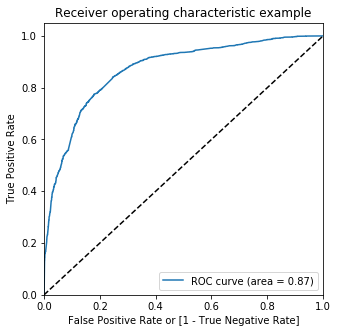

In [104]:
#ROC curve for final model
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [105]:
#predicted values based on various cut off values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.417274,5675,0,1,1,1,1,1,0,0,0,0,0
1,0,0.131377,6288,0,1,1,0,0,0,0,0,0,0,0
2,0,0.449314,5429,0,1,1,1,1,1,0,0,0,0,0
3,1,0.983352,1693,1,1,1,1,1,1,1,1,1,1,1
4,0,0.029623,3868,0,1,0,0,0,0,0,0,0,0,0


In [106]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.406477     1.000000     0.000000
0.1          0.1  0.550225     0.975288     0.259119
0.2          0.2  0.730862     0.920750     0.600817
0.3          0.3  0.776758     0.867064     0.714911
0.4          0.4  0.801524     0.762250     0.828421
0.5          0.5  0.801697     0.698764     0.872191
0.6          0.6  0.786283     0.623775     0.897578
0.7          0.7  0.760305     0.498083     0.939889
0.8          0.8  0.736751     0.399233     0.967902
0.9          0.9  0.684448     0.243289     0.986577


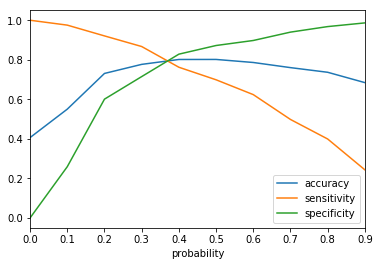

In [107]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [108]:
#assign a cut off of 0.36 which is an optimal value based on the ROC curve and further analysis
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.417274,5675,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.131377,6288,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.449314,5429,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.983352,1693,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.029623,3868,0,1,0,0,0,0,0,0,0,0,0,0


## Evaluation of final model

In [109]:
#accuracy of the model with cutoff of 0.36
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7952892275718739

In [110]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2734,  693],
       [ 489, 1858]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
#sensitivity of model with cutoff of 0.36
TP / float(TP+FN)

0.7916489135066042

In [113]:
#specificity of model with cutoff of 0.36
TN / float(TN+FP)

0.7977823168952437

In [114]:
#false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.20221768310475635


In [115]:
# Positive predictive value
print (TP / float(TP+FP))

0.7283418267346139


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8482780018616196


## Precision and recall tradeoff

In [117]:
#precision score
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7892204042348412

In [118]:
#recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6987643800596506

In [120]:
from sklearn.metrics import precision_recall_curve

In [122]:
#building precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

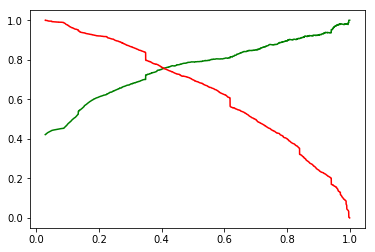

In [123]:
#plotting model
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [124]:
#scaling test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\dines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [125]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Import,Olark Chat,Reference,Welingak Website,Converted to Lead,Email Bounced,Had a Phone Conversation,Olark Chat Conversation,SMS Sent,Student,Unemployed,Working Professional
361,0,-0.659094,0,0,0,0,0,0,0,0,0,0,1,0
6594,1,-0.967708,0,1,0,0,0,1,0,0,0,0,1,0
5901,0,-0.517494,0,0,0,0,0,0,0,0,0,0,1,0
3486,0,-0.967708,0,0,1,0,0,0,0,0,1,0,1,0
5676,0,-0.831555,0,0,1,0,0,0,0,0,0,0,1,0


In [126]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [127]:
#predict prbability for test data
y_test_pred = res.predict(X_test_sm)

In [128]:
y_test_pred[:10]

361     0.119710
6594    0.049253
5901    0.137786
3486    0.940374
5676    0.859207
1814    0.315064
1425    0.991657
2684    0.995901
4824    0.676052
8730    0.363665
dtype: float64

In [129]:
#convert y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
y_pred_1.head()

,0
361,0.119710
6594,0.049253
5901,0.137786
3486,0.940374
5676,0.859207


In [131]:
#convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [132]:
#change LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [133]:
#remove index for both dataframes to append them
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
#append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [135]:
y_pred_final.head()

,Converted,LeadID,0
0,0,361,0.119710
1,0,6594,0.049253
2,0,5901,0.137786
3,1,3486,0.940374
4,0,5676,0.859207


In [136]:
#rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [137]:
#rearrange the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Converted_Prob'], axis=1)

In [138]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,361,0,0.119710
1,6594,0,0.049253
2,5901,0,0.137786
3,3486,1,0.940374
4,5676,0,0.859207


In [140]:
#predict the final outcome based on threshold
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [141]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,361,0,0.119710,0
1,6594,0,0.049253,0
2,5901,0,0.137786,0
3,3486,1,0.940374,1
4,5676,0,0.859207,1


In [143]:
#accuracy of the predictions
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7923232323232323

In [145]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1160,  285],
       [ 229,  801]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
#sensitivity of prediction
TP / float(TP+FN)

0.7776699029126214

In [148]:
#specificity of prediction.
TN / float(TN+FP)

0.8027681660899654

## Conclusion

Based on the above analysis any lead with a Lead Score above 36(0.36 probability) which is calculated using the variable in the final model, can be considered to be Hot leads and can be targeted for further marketing.